In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout,MaxPooling2D,Conv2D ,Activation
from keras.optimizers import SGD
#from tensorflow import set_random_seed
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def show(image, label):
  plt.figure()
  plt.imshow(image)
  plt.axis('off')
  plt.title(class_names[label])
  plt.show()

In [ ]:
# loading dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

* CNN : 

**hiden layers activation function : relu  , optimizer : adam , with dropout**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [19]:

'''from tensorflow import set_random_seed

set_random_seed(432)
np.random.seed(234)
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)              

Epoch 1/8
1407/1407 [==============================] - 114s 81ms/step - loss: 0.4775 - accuracy: 0.8321 - val_loss: 0.3102 - val_accuracy: 0.8863
Epoch 2/8
1407/1407 [==============================] - 113s 80ms/step - loss: 0.3470 - accuracy: 0.8736 - val_loss: 0.2780 - val_accuracy: 0.8961
Epoch 3/8
1407/1407 [==============================] - 115s 82ms/step - loss: 0.3061 - accuracy: 0.8862 - val_loss: 0.2750 - val_accuracy: 0.9010
Epoch 4/8
1407/1407 [==============================] - 114s 81ms/step - loss: 0.2758 - accuracy: 0.8983 - val_loss: 0.2652 - val_accuracy: 0.9033
Epoch 5/8
1407/1407 [==============================] - 118s 84ms/step - loss: 0.2517 - accuracy: 0.9064 - val_loss: 0.2594 - val_accuracy: 0.9069
Epoch 6/8
1407/1407 [==============================] - 115s 82ms/step - loss: 0.2330 - accuracy: 0.9133 - val_loss: 0.2713 - val_accuracy: 0.9061
Epoch 7/8
1407/1407 [==============================] - 116s 83ms/step - loss: 0.2202 - accuracy: 0.9184 - val_loss: 0.2768 -

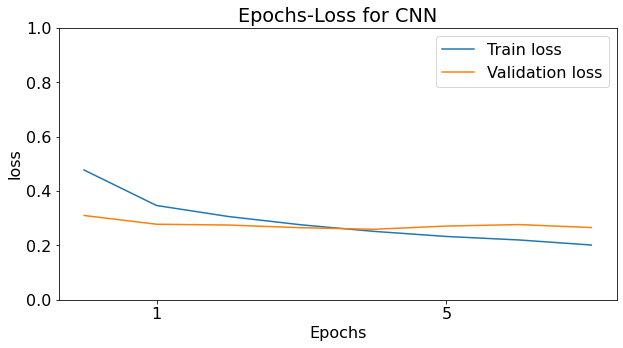

In [ ]:
batch_size = 32
epochs = 8

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.25)

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

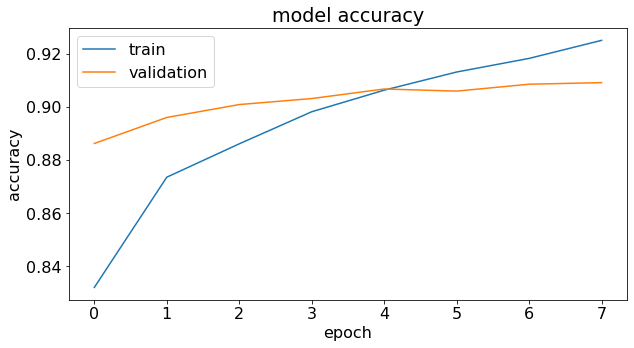

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

The epoch with the minimum validation loss is: 4
The Train Accuracy is: 0.90642
The Validation Accuracy is: 0.90687
313/313 [==============================] - 6s 18ms/step - loss: 0.3084 - accuracy: 0.9039
Test loss: 0.30835580825805664
Test accuracy: 0.9039000272750854


In [ ]:
model.save("model_{}.hd5".format(pos))

INFO:tensorflow:Assets written to: model_4.hd5/assets


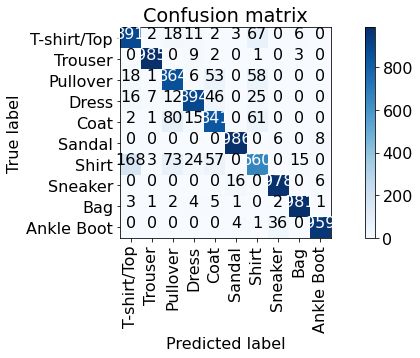

In [ ]:
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**hiden layers activation function : relu  , optimizer : adam , without dropout**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [18]:

'''from tensorflow import set_random_seed

set_random_seed(432)
np.random.seed(234)
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

epochs = 8

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

Epoch 1/8
1407/1407 [==============================] - 107s 75ms/step - loss: 1.7799 - accuracy: 0.8115 - val_loss: 0.3133 - val_accuracy: 0.8851
Epoch 2/8
1407/1407 [==============================] - 106s 75ms/step - loss: 0.2462 - accuracy: 0.9106 - val_loss: 0.2900 - val_accuracy: 0.8962
Epoch 3/8
1407/1407 [==============================] - 106s 75ms/step - loss: 0.1854 - accuracy: 0.9327 - val_loss: 0.3052 - val_accuracy: 0.9004
Epoch 4/8
1407/1407 [==============================] - 106s 75ms/step - loss: 0.1570 - accuracy: 0.9402 - val_loss: 0.3190 - val_accuracy: 0.9026
Epoch 5/8
1407/1407 [==============================] - 106s 76ms/step - loss: 0.1311 - accuracy: 0.9530 - val_loss: 0.3448 - val_accuracy: 0.8971
Epoch 6/8
1407/1407 [==============================] - 106s 75ms/step - loss: 0.1023 - accuracy: 0.9615 - val_loss: 0.3801 - val_accuracy: 0.8997
Epoch 7/8
1407/1407 [==============================] - 107s 76ms/step - loss: 0.0934 - accuracy: 0.9670 - val_loss: 0.4215 -

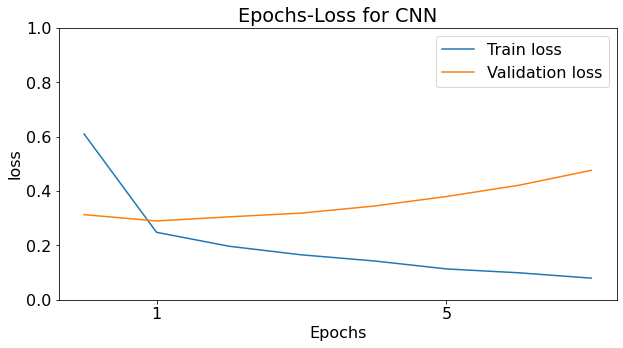

In [ ]:
batch_size = 32

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.25)

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

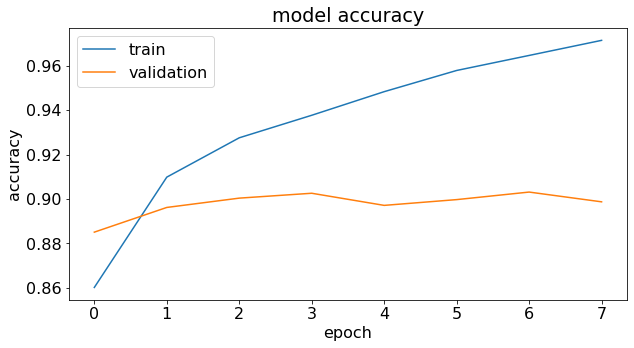

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

The epoch with the minimum validation loss is: 1
The Train Accuracy is: 0.90987
The Validation Accuracy is: 0.89620
313/313 [==============================] - 6s 18ms/step - loss: 0.5106 - accuracy: 0.8973
Test loss: 0.5106459259986877
Test accuracy: 0.8973000049591064


In [ ]:
model.save("model_{}.hd5".format(pos))

INFO:tensorflow:Assets written to: model_1.hd5/assets


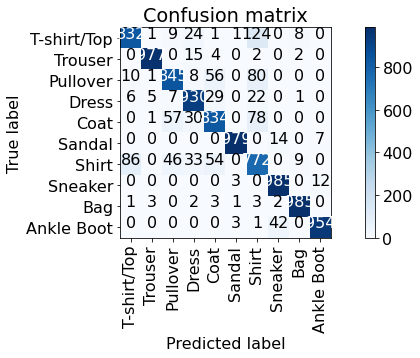

In [ ]:
model = keras.models.load_model('/content/model_1.hd5')
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**hiden layers activation function : relu  , optimizer : SGD , with dropout**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [17]:

'''from tensorflow import set_random_seed

set_random_seed(432)
np.random.seed(234)
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
sgd = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)              

In [ ]:
batch_size = 32
epochs = 8
#model.fit(X, y, callbacks=[saver], epochs=5)

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.25)


Epoch 1/8
1407/1407 [==============================] - 113s 80ms/step - loss: 0.6752 - accuracy: 0.7662 - val_loss: 0.4189 - val_accuracy: 0.8463
Epoch 2/8
1407/1407 [==============================] - 113s 81ms/step - loss: 0.4919 - accuracy: 0.8286 - val_loss: 0.3638 - val_accuracy: 0.8623
Epoch 3/8
1407/1407 [==============================] - 113s 81ms/step - loss: 0.4349 - accuracy: 0.8468 - val_loss: 0.3394 - val_accuracy: 0.8745
Epoch 4/8
1407/1407 [==============================] - 113s 80ms/step - loss: 0.3979 - accuracy: 0.8580 - val_loss: 0.3204 - val_accuracy: 0.8802
Epoch 5/8
1407/1407 [==============================] - 113s 81ms/step - loss: 0.3705 - accuracy: 0.8675 - val_loss: 0.3068 - val_accuracy: 0.8859
Epoch 6/8
1407/1407 [==============================] - 114s 81ms/step - loss: 0.3564 - accuracy: 0.8731 - val_loss: 0.2998 - val_accuracy: 0.8889
Epoch 7/8
1407/1407 [==============================] - 112s 80ms/step - loss: 0.3404 - accuracy: 0.8784 - val_loss: 0.2967 -

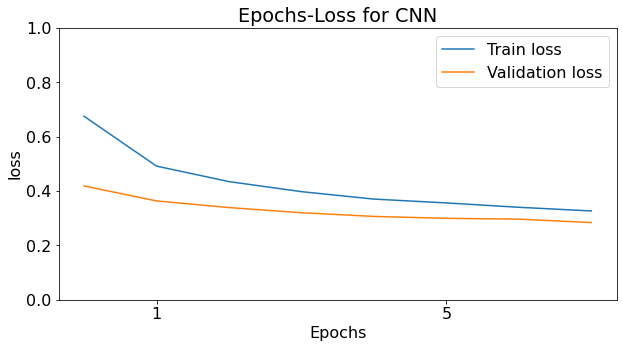

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

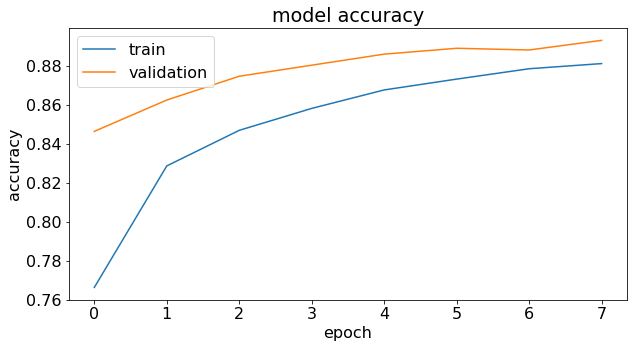

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

INFO:tensorflow:Assets written to: model_7.hd5/assets
The epoch with the minimum validation loss is: 7
The Train Accuracy is: 0.88102
The Validation Accuracy is: 0.89293
313/313 [==============================] - 6s 18ms/step - loss: 0.3031 - accuracy: 0.8892
Test loss: 0.3031052350997925
Test accuracy: 0.88919997215271


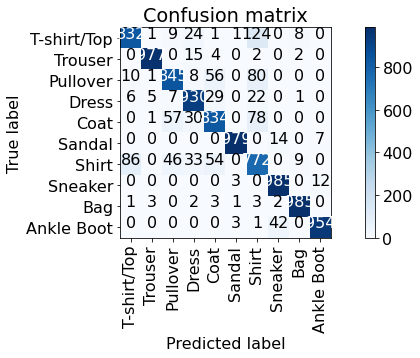

In [ ]:
model = keras.models.load_model('/content/model_1.hd5')
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**hiden layers activation function : relu  , optimizer : SGD , without dropout**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [16]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
sgd = keras.optimizers.SGD(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'])

model.summary()

epochs = 8

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [ ]:
batch_size = 32
#model.fit(X, y, callbacks=[saver], epochs=5)

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.25)

Epoch 1/8
1407/1407 [==============================] - 107s 76ms/step - loss: 1.7443 - accuracy: 0.7762 - val_loss: 0.4241 - val_accuracy: 0.8462
Epoch 2/8
1407/1407 [==============================] - 107s 76ms/step - loss: 0.3215 - accuracy: 0.8869 - val_loss: 0.3325 - val_accuracy: 0.8827
Epoch 3/8
1407/1407 [==============================] - 109s 77ms/step - loss: 0.2662 - accuracy: 0.9047 - val_loss: 0.3086 - val_accuracy: 0.8911
Epoch 4/8
1407/1407 [==============================] - 108s 77ms/step - loss: 0.2369 - accuracy: 0.9142 - val_loss: 0.3014 - val_accuracy: 0.8951
Epoch 5/8
1407/1407 [==============================] - 108s 77ms/step - loss: 0.2115 - accuracy: 0.9242 - val_loss: 0.2818 - val_accuracy: 0.8999
Epoch 6/8
1407/1407 [==============================] - 107s 76ms/step - loss: 0.1905 - accuracy: 0.9323 - val_loss: 0.2815 - val_accuracy: 0.8998
Epoch 7/8
1407/1407 [==============================] - 107s 76ms/step - loss: 0.1723 - accuracy: 0.9389 - val_loss: 0.2828 -

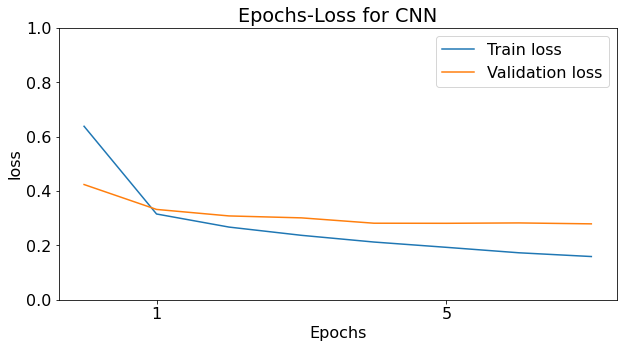

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

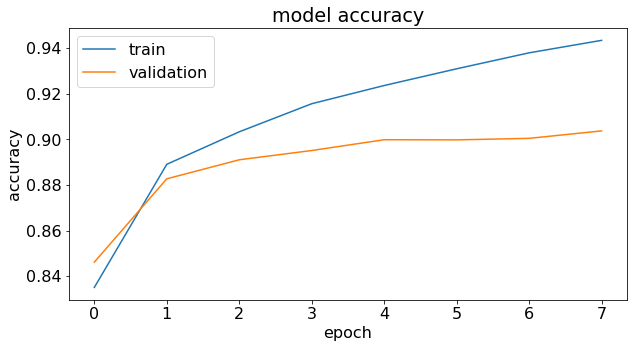

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

The epoch with the minimum validation loss is: 7
The Train Accuracy is: 0.94342
The Validation Accuracy is: 0.90373
313/313 [==============================] - 6s 18ms/step - loss: 0.2855 - accuracy: 0.8981
Test loss: 0.28549066185951233
Test accuracy: 0.8981000185012817


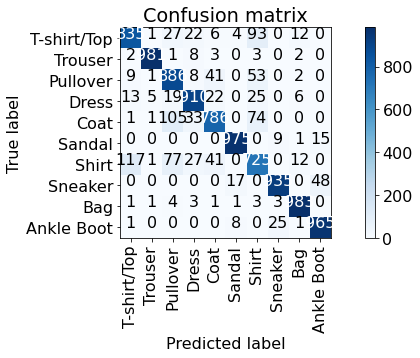

In [ ]:
model = keras.models.load_model('/content/model_7.hd5')
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**hiden layers activation function : sigmoid  , optimizer : adam , with dropout**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [20]:

'''from tensorflow import set_random_seed

set_random_seed(432)
np.random.seed(234)
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid',input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

Epoch 1/8
1407/1407 [==============================] - 121s 86ms/step - loss: 2.4347 - accuracy: 0.1002 - val_loss: 2.2384 - val_accuracy: 0.0991
Epoch 2/8
1407/1407 [==============================] - 118s 84ms/step - loss: 1.8198 - accuracy: 0.3167 - val_loss: 0.7823 - val_accuracy: 0.7167
Epoch 3/8
1407/1407 [==============================] - 119s 85ms/step - loss: 0.7694 - accuracy: 0.7294 - val_loss: 0.3363 - val_accuracy: 0.8767
Epoch 4/8
1407/1407 [==============================] - 119s 84ms/step - loss: 0.3558 - accuracy: 0.8740 - val_loss: 0.2673 - val_accuracy: 0.9011
Epoch 5/8
1407/1407 [==============================] - 119s 85ms/step - loss: 0.2910 - accuracy: 0.8974 - val_loss: 0.2455 - val_accuracy: 0.9095
Epoch 6/8
1407/1407 [==============================] - 119s 85ms/step - loss: 0.2541 - accuracy: 0.9084 - val_loss: 0.2378 - val_accuracy: 0.9139
Epoch 7/8
1407/1407 [==============================] - 119s 85ms/step - loss: 0.2346 - accuracy: 0.9139 - val_loss: 0.2328 -

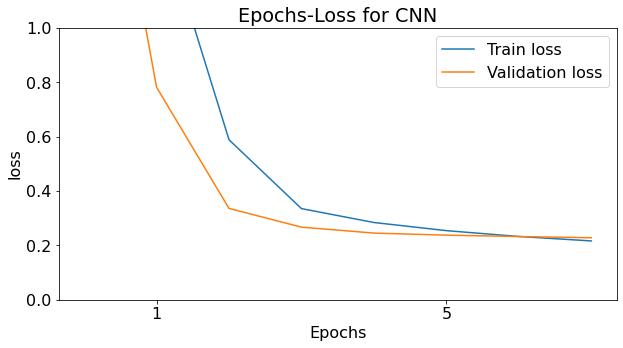

In [ ]:
batch_size = 32
epochs = 8
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.25)

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

INFO:tensorflow:Assets written to: model_1.hd5/assets


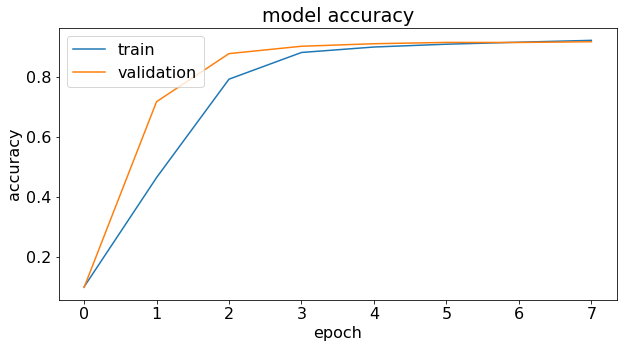

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

INFO:tensorflow:Assets written to: model_7.hd5/assets
The epoch with the minimum validation loss is: 7
The Train Accuracy is: 0.92076
The Validation Accuracy is: 0.91613
313/313 [==============================] - 6s 19ms/step - loss: 0.2448 - accuracy: 0.9093
Test loss: 0.24478363990783691
Test accuracy: 0.9093000292778015


In [ ]:
model = keras.models.load_model('/content/model_1.hd5')
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**hiden layers activation function : sigmoid  , optimizer : adam , without dropout**

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

4423680/4422102 [==============================] - 0s 0us/step


In [3]:

'''from tensorflow import set_random_seed

set_random_seed(432)
np.random.seed(234)
input_layer=layers.Input(shape=np.shape(data[0]))
p0=layers.MaxPooling2D(pool_size=(2,2))
hidden_layer_1=layers.Conv2D(20,kernel_size=(5,5),activation='sigmoid')
p1=layers.MaxPool2D(pool_size=(2,2))
hidden_layer_2=layers.Conv2D(40,kernel_size=(3,3),activation='sigmoid')
hidden_layer_3=layers.Flatten()
hidden_layer_4=layers.Dense(450,activation='sigmoid')
output_layer=layers.Dense(10,activation='softmax')
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, kernel_size=(5,5),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.20))
model.add(Conv2D(40, kernel_size=(3, 3),activation='sigmoid'))
model.add(Flatten())
model.add(Dense(450, activation='sigmoid'))
#model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 20)          16020     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 20)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 40)          7240      
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 450)               7

In [4]:
batch_size = 32
epochs = 8
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.25)



Epoch 1/8
1407/1407 [==============================] - 40s 28ms/step - loss: 1.1641 - accuracy: 0.5674 - val_loss: 0.5409 - val_accuracy: 0.8046
Epoch 2/8
1407/1407 [==============================] - 41s 29ms/step - loss: 0.5055 - accuracy: 0.8162 - val_loss: 0.4493 - val_accuracy: 0.8379
Epoch 3/8
1407/1407 [==============================] - 38s 27ms/step - loss: 0.4207 - accuracy: 0.8456 - val_loss: 0.3773 - val_accuracy: 0.8600
Epoch 4/8
1407/1407 [==============================] - 36s 25ms/step - loss: 0.3738 - accuracy: 0.8652 - val_loss: 0.4078 - val_accuracy: 0.8539
Epoch 5/8
1407/1407 [==============================] - 35s 25ms/step - loss: 0.3424 - accuracy: 0.8749 - val_loss: 0.3440 - val_accuracy: 0.8744
Epoch 6/8
1407/1407 [==============================] - 36s 26ms/step - loss: 0.3152 - accuracy: 0.8862 - val_loss: 0.3406 - val_accuracy: 0.8749
Epoch 7/8
1407/1407 [==============================] - 37s 26ms/step - loss: 0.3076 - accuracy: 0.8876 - val_loss: 0.3274 - val_ac

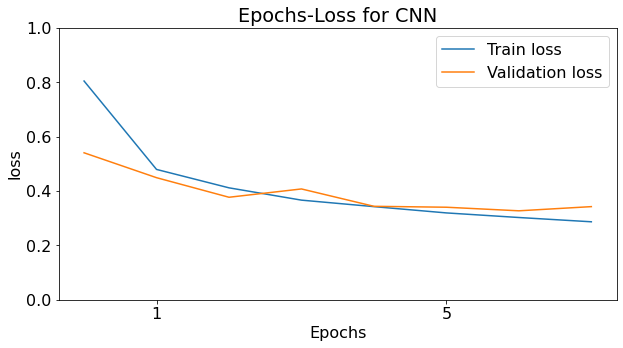

In [6]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 1))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

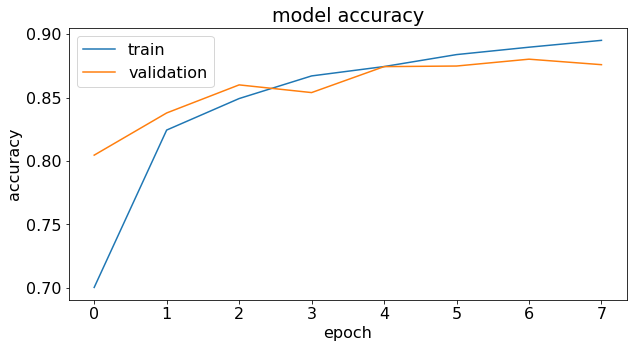

In [7]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

INFO:tensorflow:Assets written to: model_6.hd5/assets
The epoch with the minimum validation loss is: 6
The Train Accuracy is: 0.88971
The Validation Accuracy is: 0.88027
313/313 [==============================] - 4s 13ms/step - loss: 0.3602 - accuracy: 0.8716
Test loss: 0.36022529006004333
Test accuracy: 0.8715999722480774


'plot_confusion_matrix(model, X_test, y_test)  \nplt.show() '

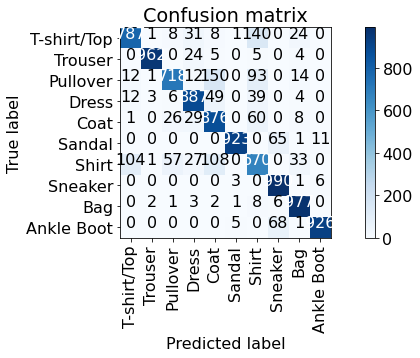

In [12]:

#from sklearn.metrics import plot_confusion_matrix
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

'''plot_confusion_matrix(model, X_test, y_test)  
plt.show() '''

In [ ]:
Y_true.shape

()

**hiden layers activation function : sigmoid  , optimizer : SGD , with dropout**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [14]:

'''from tensorflow import set_random_seed

set_random_seed(432)
np.random.seed(234)
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2),activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
sgd = keras.optimizers.SGD(learning_rate=0.001)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:
batch_size = 32
epochs = 16
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.25)


Epoch 1/16
1407/1407 [==============================] - 115s 82ms/step - loss: 2.3800 - accuracy: 0.1148 - val_loss: 2.2092 - val_accuracy: 0.4381
Epoch 2/16
1407/1407 [==============================] - 115s 82ms/step - loss: 2.2072 - accuracy: 0.1896 - val_loss: 2.0245 - val_accuracy: 0.6055
Epoch 3/16
1407/1407 [==============================] - 114s 81ms/step - loss: 2.0159 - accuracy: 0.2889 - val_loss: 1.7139 - val_accuracy: 0.7064
Epoch 4/16
1407/1407 [==============================] - 116s 82ms/step - loss: 1.7280 - accuracy: 0.3952 - val_loss: 1.4024 - val_accuracy: 0.6341
Epoch 5/16
1407/1407 [==============================] - 118s 84ms/step - loss: 1.4514 - accuracy: 0.4963 - val_loss: 1.1923 - val_accuracy: 0.7207
Epoch 6/16
1407/1407 [==============================] - 117s 83ms/step - loss: 1.2748 - accuracy: 0.5520 - val_loss: 1.0557 - val_accuracy: 0.7039
Epoch 7/16
1407/1407 [==============================] - 117s 83ms/step - loss: 1.1472 - accuracy: 0.5932 - val_loss: 0

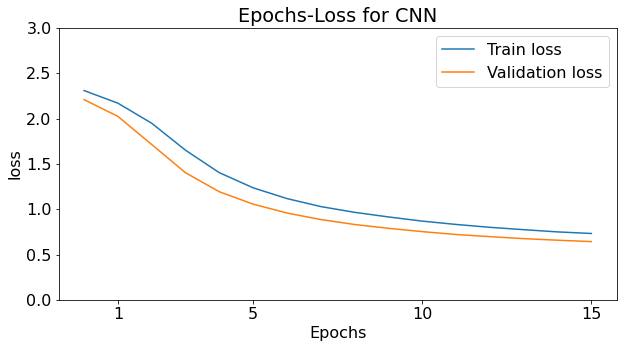

In [ ]:

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 3))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

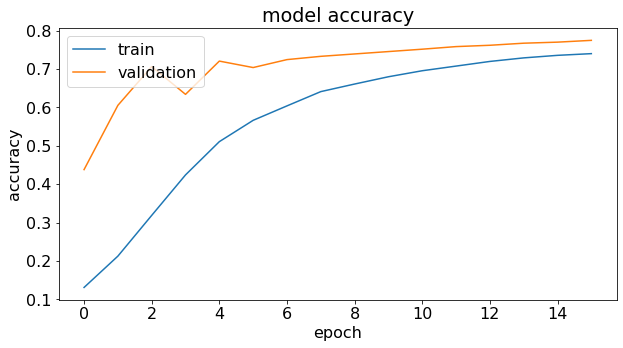

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

INFO:tensorflow:Assets written to: model_15.hd5/assets
The epoch with the minimum validation loss is: 15
The Train Accuracy is: 0.74007
The Validation Accuracy is: 0.77467
313/313 [==============================] - 6s 19ms/step - loss: 0.6604 - accuracy: 0.7634
Test loss: 0.6603871583938599
Test accuracy: 0.7634000182151794


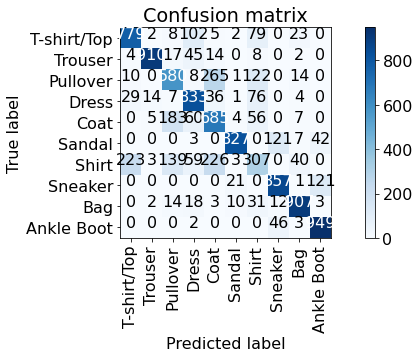

In [ ]:
model = keras.models.load_model('/content/model_15.hd5')
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**hiden layers activation function : sigmoid  , optimizer : SGD , without dropout**

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

In [15]:

'''from tensorflow import set_random_seed

set_random_seed(432)
np.random.seed(234)
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
#model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
sgd = keras.optimizers.SGD(learning_rate=0.001)


model.compile(loss='sparse_categorical_crossentropy',
              optimizer= sgd,
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               295040    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [ ]:
batch_size = 32
epochs = 8
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.25)

Epoch 1/8
1407/1407 [==============================] - 108s 77ms/step - loss: 2.2806 - accuracy: 0.2041 - val_loss: 2.1240 - val_accuracy: 0.4378
Epoch 2/8
1407/1407 [==============================] - 108s 77ms/step - loss: 2.0591 - accuracy: 0.5194 - val_loss: 1.8155 - val_accuracy: 0.5789
Epoch 3/8
1407/1407 [==============================] - 108s 77ms/step - loss: 1.7224 - accuracy: 0.6266 - val_loss: 1.4418 - val_accuracy: 0.6575
Epoch 4/8
1407/1407 [==============================] - 108s 77ms/step - loss: 1.3665 - accuracy: 0.6840 - val_loss: 1.1706 - val_accuracy: 0.6970
Epoch 5/8
1407/1407 [==============================] - 107s 76ms/step - loss: 1.1319 - accuracy: 0.7047 - val_loss: 1.0082 - val_accuracy: 0.7139
Epoch 6/8
1407/1407 [==============================] - 109s 77ms/step - loss: 0.9837 - accuracy: 0.7224 - val_loss: 0.9019 - val_accuracy: 0.7371
Epoch 7/8
1407/1407 [==============================] - 108s 77ms/step - loss: 0.8897 - accuracy: 0.7362 - val_loss: 0.8285 -

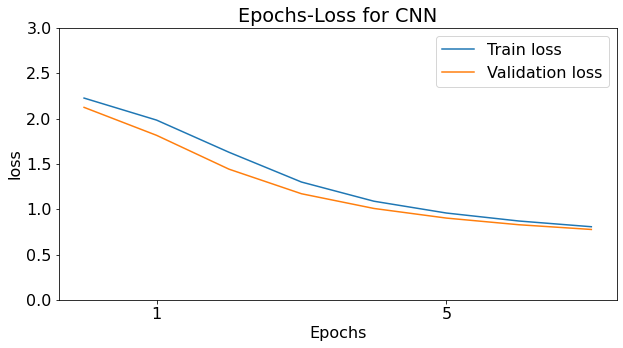

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
x_ticks = np.arange(0, epochs + 1, 5)
x_ticks [0] += 1
plt.xticks(x_ticks)
plt.ylim((0, 3))
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.title("Epochs-Loss for CNN")
plt.legend()
plt.show()

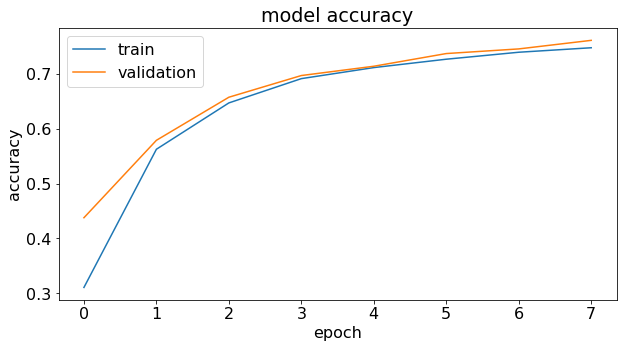

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
pos = np.argmin(history.history['val_loss'])
model.save("model_{}.hd5".format(pos))
print("The epoch with the minimum validation loss is:", pos)
print("The Train Accuracy is: {0:.5f}".format(history.history['accuracy'][pos]))
print("The Validation Accuracy is: {0:.5f}".format(history.history['val_accuracy'][pos]))


loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

INFO:tensorflow:Assets written to: model_7.hd5/assets
The epoch with the minimum validation loss is: 7
The Train Accuracy is: 0.74764
The Validation Accuracy is: 0.76113
313/313 [==============================] - 6s 19ms/step - loss: 0.7949 - accuracy: 0.7469
Test loss: 0.7949413657188416
Test accuracy: 0.7469000220298767


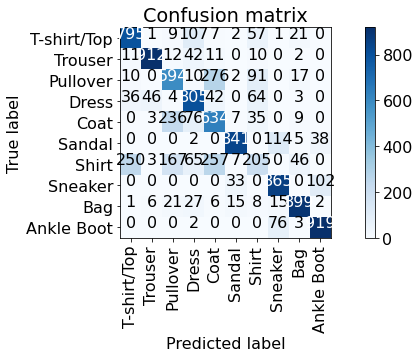

In [ ]:
model = keras.models.load_model('/content/model_7.hd5')
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])


**with normalizing : ..............................................**

In [ ]:
X_train = X_train /255.0 
X_test = X_test /255.0

----------------------------------------------------------------------------

In [ ]:
# normalizing dataset from 0 to 1
train_images, test_images = train_images/255., test_images/255.

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle-boot']

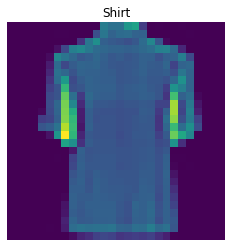

In [ ]:
index = 256
show(train_images[index], train_labels[index])

In [ ]:
# sequential class 
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# declaring optimizer for network
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')

In [ ]:
# trainig process by 5 epochs
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

In [ ]:
# model evaluation
index = 10
print(model.predict(test_images[index:index+1]))
print(np.sum(model.predict(test_images[index:index+1])))
predicted = np.argmax(model.predict(test_images[index:index+1]))
print(class_names[predicted])
show(test_images[index], predicted)